In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def load_count(filepath: str) -> pd.DataFrame:
    _df = pd.read_csv(filepath)
    _df['year_month'] = _df.apply(lambda x: pd.to_datetime(x['year_month'], format='%Y-%m-%d %H:%M:%S'), axis=1)
    return _df


def plot_count(dataframes: list[pd.DataFrame], legend=None, out="comments_count.png") -> None:
    plt.figure(figsize=(8, 4))
    plt.ticklabel_format(useOffset=False, style='plain')
    for _df in dataframes:
        plt.plot(_df['year_month'], _df['row_count'])
    if legend:
        plt.legend(legend)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Number of posts and comments')
    if out:
        plt.savefig(out, bbox_inches='tight')
    plt.show()


def plot_increase(dataframes: list[pd.DataFrame], legend=None, out="comments_increase.png") -> None:
    plt.figure(figsize=(8, 4))
    plt.ticklabel_format(useOffset=False, style='plain')
    for _df in dataframes:
        if _df is None:
            plt.plot([], [], label='_nolegend_')
        else:
            plt.plot(_df['year_month'], _df['row_count'] * 100 / _df['row_count'].max())
    if legend:
        plt.legend(legend)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.ylabel('Number of posts and comments')
    if out:
        plt.savefig(out, bbox_inches='tight')
    plt.show()


def plot_count_by_year(dataframes: list[pd.DataFrame], legend=None, out="comments_count_by_year.png") -> None:
    plt.figure(figsize=(8, 4))
    plt.ticklabel_format(useOffset=False, style='plain')
    for _df in dataframes:
        _d = _df.groupby(_df['year_month'].dt.year).sum(True)
        plt.bar(_d.index, _d['row_count'])
    if legend:
        plt.legend(legend)
    plt.xlabel('Date')
    plt.ylabel('Number of posts and comments')
    if out:
        plt.savefig(out, bbox_inches='tight')
    plt.show()

In [23]:
df_orig = load_count('csv/comments_count_orig.csv')
df_delete_deleted = load_count('csv/comments_count_1.csv')
df_select_longer_than_1000 = load_count('csv/comments_count_2.csv')

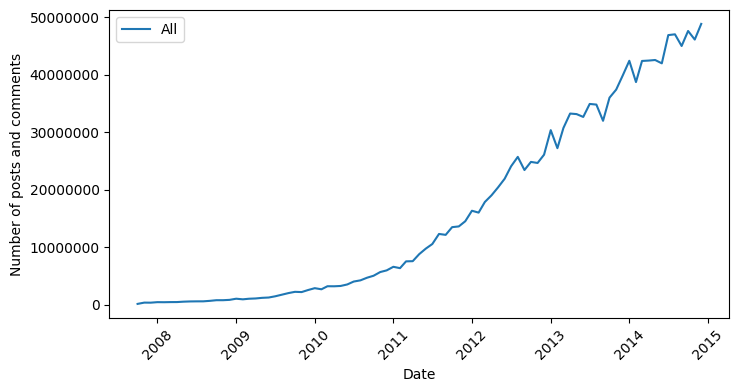

In [24]:
plot_count([df_orig],
           legend=['All'],
           out='report/src/images/comments_count_initial.png')

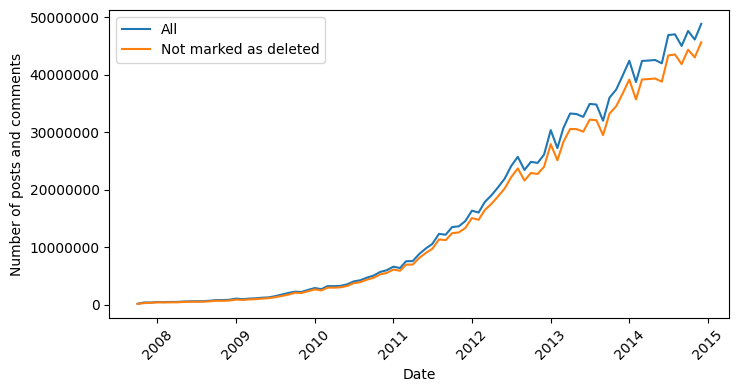

In [25]:
plot_count([df_orig, df_delete_deleted],
           legend=['All',
                   'Not marked as deleted'],
           out='report/src/images/comments_count_first_clean.png')

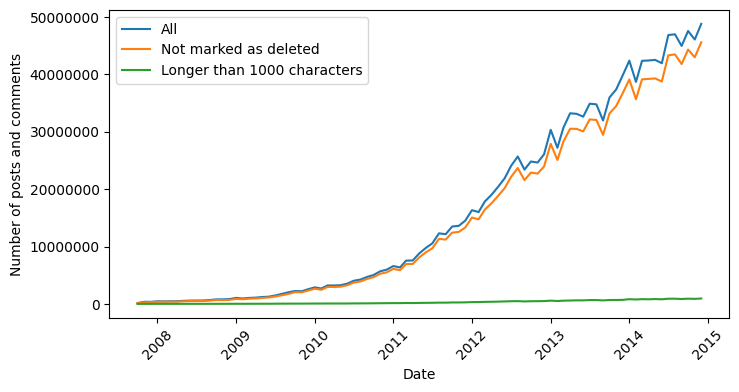

In [26]:
plot_count([df_orig, df_delete_deleted, df_select_longer_than_1000],
           legend=['All',
                   'Not marked as deleted',
                   'Longer than 1000 characters'],
           out='report/src/images/comments_count_second_clean.png')

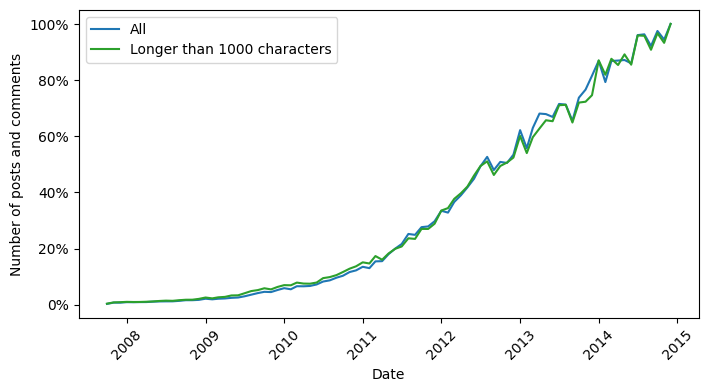

In [36]:
plot_increase([df_orig, None, df_select_longer_than_1000],
               legend=['All',
                      'Longer than 1000 characters'],
               out='report/src/images/comments_count_second_clean_compare.png')

In [ ]:
plot_count([df_orig, df_delete_deleted, df_select_longer_than_1000],
           legend=["Original", "DELETE FROM reddit WHERE body = '[deleted]'",
                   "SELECT INTO cleared FROM reddit WHERE length(body) > 1000"])

In [ ]:
plot_increase([df_orig, df_delete_deleted, df_select_longer_than_1000],
              legend=["Original", "DELETE FROM reddit WHERE body = '[deleted]'",
                      "SELECT INTO cleared FROM reddit WHERE length(body) > 1000"])

In [ ]:
plot_count_by_year([df_orig, df_delete_deleted, df_select_longer_than_1000],
                   legend=["Original", "DELETE FROM reddit WHERE body = '[deleted]'",
                           "SELECT INTO cleared FROM reddit WHERE length(body) > 1000"])

In [ ]:
df_select_longer_than_1000['row_count'].sum() / df_orig['row_count'].sum()